<a href="https://colab.research.google.com/github/SujayNaik17/sentiment-classification/blob/main/Notebooks/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set file path (Update your actual file path here)
file_path = '/content/drive/MyDrive/Sentiment Analysis/Web Scrapper/review_dataset.csv'



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/drive


In [2]:
import csv

clean_rows = []

# Read raw CSV and filter rows with exactly 5 fields
with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    headers = next(reader)  # read header
    for row in reader:
        if len(row) == 5:
            clean_rows.append(row)

# Convert to DataFrame
df = pd.DataFrame(clean_rows, columns=headers)
print("Data loaded with only valid rows!")
display(df.tail())


Data loaded with only valid rows!


,Product Name,Product ID,Review Text,Review Rating,Reviewer Verified
8795,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,Good,5,Yes
8796,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,Its not a reasonable priceToo much of cost as...,2,Yes
8797,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,2 to 3 people it's good in off I write review...,5,Yes
8798,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,Nice,4,Yes
8799,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,nice,3,Yes


In [3]:
cleaned_file_path = '/content/drive/MyDrive/Sentiment Analysis/Web Scrapper/cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f" Cleaned CSV saved at: {cleaned_file_path}")
file_path= cleaned_file_path


 Cleaned CSV saved at: /content/drive/MyDrive/Sentiment Analysis/Web Scrapper/cleaned_data.csv


In [4]:
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:", df.columns.tolist())


Shape of the dataset: (8800, 5)

Columns in the dataset: ['Product Name', ' Product ID', ' Review Text', ' Review Rating', ' Reviewer Verified']


In [5]:
print("Original columns:", df.columns.tolist())
df.columns = df.columns.str.strip()
print("Cleaned columns:", df.columns.tolist())


Original columns: ['Product Name', ' Product ID', ' Review Text', ' Review Rating', ' Reviewer Verified']
Cleaned columns: ['Product Name', 'Product ID', 'Review Text', 'Review Rating', 'Reviewer Verified']


In [6]:
# Ensure 'Review Rating' is numeric
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')

# 🪄 Assign sentiment labels based on rating
def assign_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment Label'] = df['Review Rating'].apply(assign_sentiment)

# Preview the updated DataFrame
print("Sentiment labels (including neutral) created successfully!")
display(df[['Review Text', 'Review Rating', 'Sentiment Label']].head())


Sentiment labels (including neutral) created successfully!


,Review Text,Review Rating,Sentiment Label
0,Best in class,5,positive
1,Nice,5,positive
2,Good quality,5,positive
3,Weast,1,negative
4,Super,5,positive


In [7]:
display(df.tail())

,Product Name,Product ID,Review Text,Review Rating,Reviewer Verified,Sentiment Label
8795,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,Good,5,Yes,positive
8796,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,Its not a reasonable priceToo much of cost as...,2,Yes,negative
8797,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,2 to 3 people it's good in off I write review...,5,Yes,positive
8798,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,Nice,4,Yes,positive
8799,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,nice,3,Yes,neutral


# *Preprocessing*
1. Lowercase
2. Remove emojis
3. Remove Punctuation and symbols
4. Remove Digits
5. Remove Non-alphabetic characters
6. Tokenize
7. Remove Stopwords

In [8]:
stop_words = set(stopwords.words('english'))

def clean_review(text):
    if not isinstance(text, str):
        return ""

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 3. Remove punctuation and symbols
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)

    # 4. Remove digits
    text = re.sub(r"\d+", "", text)

    # 5. Remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # 6. Tokenize
    tokens = word_tokenize(text)

    # 7. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 8. Join back into cleaned string
    cleaned_text = " ".join(tokens)

    return cleaned_text

In [9]:
# Apply cleaning
df['Cleaned Review'] = df['Review Text'].apply(clean_review)

# Preview cleaned text
df[['Review Text', 'Cleaned Review']].head()


,Review Text,Cleaned Review
0,Best in class,best class
1,Nice,nice
2,Good quality,good quality
3,Weast,weast
4,Super,super


In [16]:
display(df.tail())

,Product Name,Product ID,Review Text,Review Rating,Reviewer Verified,Sentiment Label
8795,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,good,5,Yes,positive
8796,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,reasonable pricetoo much cost compared brands,2,Yes,negative
8797,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,people good write review months working good o...,5,Yes,positive
8798,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,nice,4,Yes,positive
8799,Panasonic SR-WA22H E Electric Rice Cooker (2.2 L,itmey4vvgkzcyraq,nice,3,Yes,neutral


In [11]:
# Strip any whitespace from column names first
df.columns = df.columns.str.strip()

# Check if 'Review Text' exists before dropping
if 'Review Text' in df.columns:
    df.drop(columns=['Review Text'], inplace=True)
    print(" Dropped old 'Review Text' column.")
else:
    print("'Review Text' column not found — skipping drop.")

#  Rename 'Cleaned Review' to 'Review Text' (if it exists)
if 'Cleaned Review' in df.columns:
    df.rename(columns={'Cleaned Review': 'Review Text'}, inplace=True)
    print(" Renamed 'Cleaned Review' to 'Review Text'.")
else:
    print("'Cleaned Review' column not found — skipping rename.")

# Optional: Reorder columns (check they all exist)
expected_columns = ['Product Name', 'Product ID', 'Review Text', 'Review Rating', 'Reviewer Verified', 'Sentiment Label']
df = df[[col for col in expected_columns if col in df.columns]]

# Show updated DataFrame
display(df.head())

# Remove rows where 'Review Text' is missing or NaN
df = df.dropna(subset=['Review Text'])

# Save to Drive
cleaned_file_path = '/content/drive/MyDrive/Sentiment Analysis/Web Scrapper/cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned CSV saved at: {cleaned_file_path}")


 Dropped old 'Review Text' column.
 Renamed 'Cleaned Review' to 'Review Text'.


,Product Name,Product ID,Review Text,Review Rating,Reviewer Verified,Sentiment Label
0,MILTON Flip lid 1000 Thermosteel Water Bottle,itm50665b7f93ce2,best class,5,Yes,positive
1,MILTON Flip lid 1000 Thermosteel Water Bottle,itm50665b7f93ce2,nice,5,Yes,positive
2,MILTON Flip lid 1000 Thermosteel Water Bottle,itm50665b7f93ce2,good quality,5,Yes,positive
3,MILTON Flip lid 1000 Thermosteel Water Bottle,itm50665b7f93ce2,weast,1,Yes,negative
4,MILTON Flip lid 1000 Thermosteel Water Bottle,itm50665b7f93ce2,super,5,Yes,positive


Cleaned CSV saved at: /content/drive/MyDrive/Sentiment Analysis/Web Scrapper/cleaned_data.csv


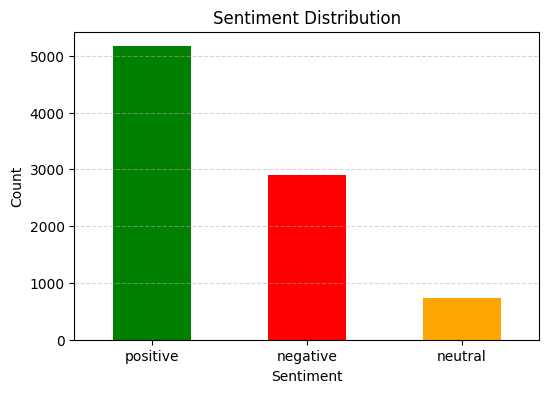

In [12]:
sentiment_counts = df['Sentiment Label'].value_counts()

color_map = {
    'negative': 'red',
    'neutral': 'orange',
    'positive': 'green'
}
colors = [color_map[label] for label in sentiment_counts.index]

# Plot
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


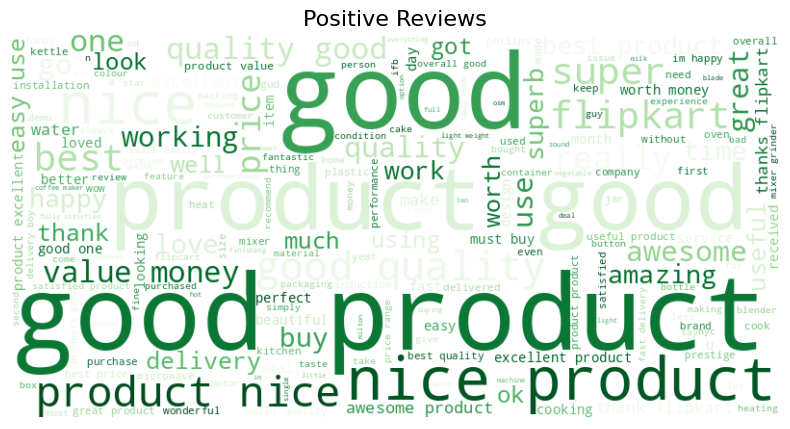

In [13]:
from wordcloud import WordCloud

# WordCloud function
def generate_wordcloud(text, title, color='black'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Prepare text for each sentiment
positive_text = " ".join(df[df['Sentiment Label'] == 'positive']['Review Text'])
neutral_text  = " ".join(df[df['Sentiment Label'] == 'neutral']['Review Text'])
negative_text = " ".join(df[df['Sentiment Label'] == 'negative']['Review Text'])

# Generate WordClouds
generate_wordcloud(positive_text, "Positive Reviews", color='Greens')



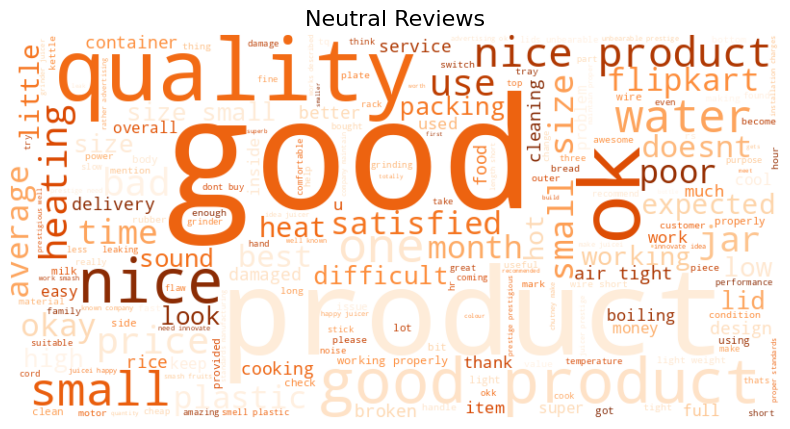

In [14]:
generate_wordcloud(neutral_text,  "Neutral Reviews", color='Oranges')


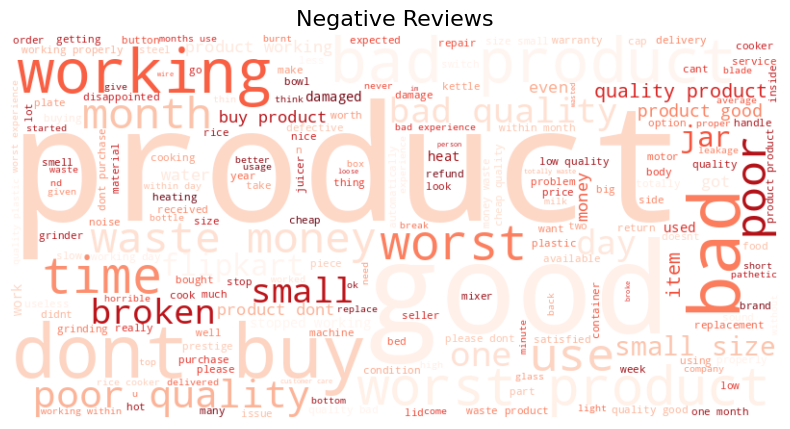

In [15]:
generate_wordcloud(negative_text, "Negative Reviews", color='Reds')